### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime
import seaborn as sns

from googletrans import Translator

## About the data

The data were collected from [Petroleum National Agency Statistical Yearbook 2020](http://www.anp.gov.br/publicacoes/anuario-estatistico/anuario-estatistico-2020), ANP *(Portuguese: Agência Nacional de Petróleo)*, that consolidates data on the performance of the Brazilian oil, natural gas and biofuels industry and the national supply system in 2010-2019.

## Wrangling Data

#### Looking at the data

The first step is to understand the data and know how it is stored. For that we will open the csv file and see it in its original form.

<img src="data_set/df1-page-001.jpg"  width="800" align="center">


#### The subject

It is a table, in Portuguese, about the production of Brazilian natural gas in million cubic meters during the years 2010-2019. This production is grouped by federation unit and followed by location. 

At federation unit (first) column, in addition to the gas producing states, on the top of it there is also the total and the subtotal of national production. 

The location can be categorized as onshore and as offshore, however the national production can also be categorized according to its geological layer, pre-salt and post-salt. 

The last column is the gas production ratio between 2019 and 2018.

At the bottom there are the table's source and an observation saying that the total value of production includes the volumes of reinjection, burning, reduction and own consumption.

#### Creating a DataFrame

Pandas will be used to read a csv file and create the dataframe.

In [2]:
df = pd.read_excel(r'data_set/anuario-2020-tabela-2_30.xls',  header = [0,2,3], index_col = [0,1], skipinitialspace=True)

Now lets take a look into how `df` will be displayed.

In [3]:
df.head()

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019 Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019  \
Capacidade de processamento (mil m3/dia)1                                                                                                                                   Capacidade de processamento (mil m3/dia)1   
2010                                                                                                                                                                                                             2011   
Total   76396                                                                                                                                         90396.0                                                           
        76396                                                                                                                                             NaN                                                           
Urucu   9706                                                                                                                                           9706.0                                                           
Lubnor  350                                                                                                                                             350.0                                                           
Guamaré 5700                                                                                                                                           5700.0                                                           

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2012   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2013   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2014   


It doesn't look good. Since the csv file is a multi-indexed table, it will be necessary to set the `head` and `index_col` parameters of the `pd.read_excel()` function, in order to make the correct indexation of the dataframe according to the original table. 

Looking again at the table, is easy to tell that rows `1, 3` and `4` goes for the `header` (columns labels) and the columns `A` and `B` goes for the `index_col` (index labels). It is important to notice that the parameters must be sended as index (e.g. column `A` refers to index `0`, and `B` to `1`.)

<img src="data_set/df1_header_index_col.png" width="800" height="240" align="center"/>

#### Reading Dataframe as a MultiIndexed Table

In [4]:
df = pd.read_excel(r'data_set/anuario-2020-tabela-2_30.xls',  header = [0,2,3], index_col = [0,1], skipinitialspace=True)


In [5]:
df.head()

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019 Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019  \
Capacidade de processamento (mil m3/dia)1                                                                                                                                   Capacidade de processamento (mil m3/dia)1   
2010                                                                                                                                                                                                             2011   
Total   76396                                                                                                                                         90396.0                                                           
        76396                                                                                                                                             NaN                                                           
Urucu   9706                                                                                                                                           9706.0                                                           
Lubnor  350                                                                                                                                             350.0                                                           
Guamaré 5700                                                                                                                                           5700.0                                                           

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2012   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2013   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2014   


Now that we have the MultiIndexed configuration ready, we should drop all unnecessary rows and columns. 

In this specific table, the first two levels of column's labels can be dropped to improve its readability. But they are useful information that may need later on. So it is a good idea to keep those informations (title and unit). We also will need to translate some information to English, using `Translator()` class from `googletrans` package.

#### Saving and Translating Table's Title and Unit

In [6]:
translator = Translator()

In [7]:
title = translator.translate(df.columns[0][0]).text
title

'Table 2.30 - Evolution of natural gas processing capacity, according to producer poles - 2010-2019'

In [8]:
unit = translator.translate(df.columns[1][1]).text
unit

'Processing capacity (thousand m3 / day) 1'

#### Dropping Unnecessary Rows and Columns

First, lets drop the two first MultiIndex level from columns.

##### First Two Levels From Column MultiIndex

In [9]:
df.columns = df.columns.droplevel(0)
df.columns = df.columns.droplevel(0)

In [10]:
df.head()

2010              2011     2012     2013     2014     2015     2016     2017  \
Total   76396  90396.0  90396.0  90396.0  96390.0  95350.0  95650.0  95650.0   
        76396      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Urucu   9706    9706.0   9706.0   9706.0  12200.0  12200.0  12200.0  12200.0   
Lubnor  350      350.0    350.0    350.0    350.0    350.0    350.0    350.0   
Guamaré 5700    5700.0   5700.0   5700.0   5700.0   5700.0   5700.0   5700.0   

2010              2018      2019  
Total   76396  95650.0  107210.0  
        76396      NaN       NaN  
Urucu   9706   12200.0   12200.0  
Lubnor  350      350.0     350.0  
Guamaré 5700    5700.0    5700.0

##### NaN Rows and Columns

Now lets get rid off all NaN rows and columns.

In [11]:
df.dropna(how = 'all', inplace = True)
df.dropna(axis=1, how = 'all', inplace = True)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candeias,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Estação Vandemir Ferreira,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


##### Ratio Column

The last column is the ratio of gas production between 2018 and 2019. We can get this data with basic coding and left this information there can turn plotting annoying, so lets drop it.

In [12]:
if (df.iloc[:,-1].replace('..', 0).round().all() == (((df.iloc[:,-2]-df.iloc[:,-3])/df.iloc[:,-3])*100).round().all()):
    df = df.drop(df.columns[-1], axis=1)
    
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candeias,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Estação Vandemir Ferreira,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


#### Correcting Index Labels

Now we need to correct the index's labels. 

As you can see, some of table are in Portuguese so we need a method able to translate from Portuguese to English, if is necessary.

##### Translating Index Labels

In [13]:
if df.index.nlevels > 1:
    
    for i, num in enumerate(df.index):
        for j in range(df.index.nlevels):
            if j==0:
                if (df.index[i][j] == 'Espírito_Santo') or (df.index[i][j] == 'Espirito_Santo'):
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Espírito_Santo','Espirito_Santo'), level = j)
                elif df.index[i][j] == 'Amazonas':
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Amazonas','Amazonas'), level = j)
                elif df.index[i][j] == 'Alagoas':
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Alagoas','Alagoas'), level = j)
                elif (df.index[i][j] == 'Ceará') or (df.index[i][j] == 'Ceara'):
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Ceará','Ceara'), level = j)
                elif (df.index[i][j] == 'Rio Grande do Norte') or (df.index[i][j] == 'Rio_Grande_do_Norte'):
                    df.index = df.index.set_levels(df.index.levels[j].str.replace(' ','_'), level = j)
                else:
                    df.index = df.index.set_levels(df.index.levels[j].str.replace(df.index[i][j], translator.translate(df.index[i][j]).text), level = j)
            if j==1:
                if df.index[i][j] == 'Mar': # checks if one of the words that the translate package can not translate
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Mar','Offshore'), level = j)
                elif df.index[i][j] == 'Terra': # checks if one of the words that the translate package can not translate
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Terra','Onshore'), level = j)
                elif not isinstance(df.index[i][j], str):
                    pass
                else:
                    df.index = df.index.set_levels(df.index.levels[j].str.replace(df.index[i][j], translator.translate(df.index[i][j]).text), level = j)
                    
elif df.index.nlevels == 1:
    new_index = []
    for index in df.index:
        if index == 'Reinjeção':
            new_index.append('Reinjection')
        else:
            new_index.append(translator.translate(index).text)
    df.index = new_index

In [14]:
if df.index.nlevels == 1:
    new_index = []
    for index in df.index:
        if index == 'Reinjeção':
            new_index.append('Reinjection')
        else:
            new_index.append(translator.translate(index).text)
    df.index = new_index

In [15]:
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candles,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Vandemir Ferreira Station,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


##### Replacing white spaces for underscore

In [16]:
for i, level in enumerate(range(1,df.index.nlevels,1)):
            df.index = df.index.set_levels(df.index.levels[i].str.replace(" ", "_"), level = i)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candles,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Vandemir_Ferreira_Station,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


##### MyDataFrame Class

In order to capture and simplify access to some important informations *(e.g. title, unit)* about the tables collected, and to assembly all functions as methods in a the same place, a class was created. `MyDataFrame` class also perfomes some changes into the original tables to improve their readability and to translate some terms.

Parameters:

>`df`: is a csv file readed by pd.read_csv function.

>`translate`: is a boolean that calls the translate method.

>`translate_first_level`: is a boolean that says if the first level of a MultiIndex DataFrame should be translated or not, since some of them are proper noun and should not be translated.

>`white_space`: is a boolean that replace white space for underscore in all indexes, in case of using loc function.

>`drop_level`: is a boolean that calls the drop_levels method and drops column levels from a MultiIndex DataFrame until becames a Index DataFrame.


Atributes:

>`df`: is the DataFrame it self.

>`title`: is the DataFrame's title.

>`unit`: is the DataFrame's units.

Methods:

>`drop_na()`: drops all rows and columns that have all values equals to NaN.

> `drop_levels()`:  drops all levels that categorize the table itself, and not its values individually. However those informations are allocated as table's title and unit for later use.

>`index_translate_index()`: translate a index DataFrame to English.

>`index_translate_multi_index()`: translate a MultiIndex DataFrame to English.

>`replace_white_space()`: replace any white space within a string.

>`drop_last_column()`: drop the last column if it has been configured as an unnamed column. The value of this column is a ratio that is redundant to our project.

Translations from Portuguese to English will also be performed within the class using `googletrans` package. The words that are not supported by the package will be translated directly using a dictionary.

In [17]:
class MyDataFrame: 
    def __init__(self, df, translate=False, translate_first_level=False, white_space=False, drop_level=True):
        
        self.df = df
        self.translator = Translator()
        self.title = ""
        self.unit = ""
        self.translate = translate
        self.translate_first_level = translate_first_level
        self.white_space= white_space
        self.drop_level = drop_level
        #self.ratio = (((self.df.iloc[:,-2]-self.df.iloc[:,-3])/self.df.iloc[:,-3])*100).round()
        #self.last_column = self.df.iloc[:,-1].replace('..', 0).round()
        
        self.drop_na()
        
        if self.df.index.nlevels > 1:
            self.title_unit_multiindex();
        
        if self.drop_level:
            self.drop_levels()
            
        #if (self.ratio == self.last_column).all():
        #   self.drop_last_column()
        
        
        if self.translate:
            if self.df.index.nlevels == 1:
                self.translate_index()
                
            
        if self.translate:
            if self.df.index.nlevels > 1:
                self.translate_multi_index()
        
        
        if self.white_space:
            self.replace_white_space()
            
            
    def title_unit_multiindex(self):
        self.title = self.df.columns[0][0]
        self.unit = self.df.columns[1][1]
            
    def drop_levels(self):
        """
        This method drops two column levels that contained the infos previously captured (table's title and unit)
        """     
        while self.df.columns.nlevels>1:
            self.df.columns = self.df.columns.droplevel(0)
            
            
    def drop_na(self):
        """
        This method drops all rows and columns that have all values equals to NaN.
        """  
        self.df.dropna(how = 'all', inplace = True)
        self.df.dropna(axis = 'columns', how = 'all', inplace = True)

    
    def translate_index(self):
        """
        This method translates the index of a DataFrame to English.
        """
        self.new_index = []
        for index in self.df.index:
            if index == 'Reinjeção':
                self.new_index.append('Reinjection')
            elif (index == 'Espírito Santo') or (index == 'Espirito_Santo'):
                self.new_index.append('Espirito_Santo')
            elif index == 'Amazonas':
                self.new_index.append('Amazonas')
            elif index == 'Alagoas':
                self.new_index.append('Alagoas')
            elif (index == 'Ceará') or (index == 'Ceara'):
                self.new_index.append('Ceara')
            elif (index == 'Rio Grande do Norte') or (index == 'Rio_Grande_do_Norte'):
                self.new_index.append('Rio_Grande_do_Norte')
            else:
                self.new_index.append(self.translator.translate(index).text)
        self.df.index = self.new_index
        
                        
    def translate_multi_index(self):
        """
        This method translates a MultiIndex DataFrame to English.
        """
        
        if self.translate_first_level == True:
            for i, num in enumerate(self.df.index):
                    for j in range(self.df.index.nlevels):       
                        if j==0:
                            if (self.df.index[i][j] == 'Espírito_Santo') or (self.df.index[i][j] == 'Espirito_Santo'):
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Espírito_Santo','Espirito_Santo'), level = j)
                            elif self.df.index[i][j] == 'Amazonas':
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Amazonas','Amazonas'), level = j)
                            elif self.df.index[i][j] == 'Alagoas':
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Alagoas','Alagoas'), level = j)
                            elif (self.df.index[i][j] == 'Ceará') or (self.df.index[i][j] == 'Ceara'):
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Ceará','Ceara'), level = j)
                            elif (self.df.index[i][j] == 'Rio Grande do Norte') or (self.df.index[i][j] == 'Rio_Grande_do_Norte'):
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace(' ','_'), level = j)
                            else:
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace(self.df.index[i][j], self.translator.translate(self.df.index[i][j]).text), level = j)
        
        for i, num in enumerate(self.df.index):
            for j in range(self.df.index.nlevels):
                if j==0:
                    pass
                if j==1:
                    if self.df.index[i][j] == 'Mar': # checks if one of the words that the translate package can not translate
                        self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Mar','Offshore'), level = j)
                    elif self.df.index[i][j] == 'Terra': # checks if one of the words that the translate package can not translate
                        self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Terra','Onshore'), level = j)
                    elif not isinstance(self.df.index[i][j], str):
                        pass
                    else:
                        self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace(self.df.index[i][j], self.translator.translate(self.df.index[i][j]).text), level = j)
                
          
    def replace_white_space(self):
        """
        This method replaces all white space for underscore.
        """
        if self.df.index.nlevels > 1: # tells how many level are
            for i, level in enumerate(range(self.df.index.nlevels)): # runs through levels
                #for j, value in enumerate(self.df.index.levels[i]): # runs through the level's value and replace white space for underline
                self.df.index = self.df.index.set_levels(self.df.index.levels[i].str.replace(" ", "_"), level = i)
                
        elif self.df.index.nlevels == 1:
            self.new_index = []
            for index in self.df.index:
                self.new_index.append(index.replace(' ', '_'))
            self.df.index = self.new_index
        
        
    def replace_underscore(self):
        """
        This method replaces all underscore for white space.
        """
        if self.df.index.nlevels > 1: # tells how many level are
            for i, level in enumerate(range(self.df.index.nlevels)): # runs through levels
                #for j, value in enumerate(self.df.index.levels[i]): # runs through the level's value and replace white space for underline
                self.df.index = self.df.index.set_levels(self.df.index.levels[i].str.replace("_", " "), level = i)
        
        elif self.df.index.nlevels == 1:
            self.new_index = []
            for index in self.df.index:
                self.new_index.append(index.replace('_', ' '))
            self.df.index = self.new_index
            
            
    def drop_last_column(self):
        """
        This method drops the last column if it is a ration between columns[-2] and columns[-3] .
        """            
        self.df = self.df.drop(self.df.columns[-1], axis=1)

## Reading Data

### Total Reserves

* 'Tabela 2.5 – Reservas totais1 de gás natural, por localização (terra e mar), segundo Unidades da Federação2 – 2010-2019'

In [18]:
total_reserves = MyDataFrame(pd.read_excel(r'data_set/anuario-2020-tabela-2_5.xls',  header = [0,2,3], index_col = [0,1], skipinitialspace=True), translate=True,)
total_reserves.drop_last_column()
total_reserves.df

2010         2011           2012  \
Total               NaN       824723.2222  906530.6250  918568.744479   
Subtotal            Onshore   117227.0756  118523.9164  140979.405510   
                    Offshore  707496.1466  788006.7086  777589.338969   
Amazonas            Onshore    94456.2943   95742.7805   89236.607701   
Maranhão            Onshore        0.0000       0.0000   29704.588918   
Ceará               Onshore        0.0000       0.0000       0.000000   
                    Offshore    1447.0109     993.2576     453.825274   
Rio Grande do Norte Onshore     2188.7258    2277.2275    3274.698434   
                    Offshore   11354.6855   12038.6400   10401.348605   
Alagoas             Onshore     4173.3458    4335.7954    4222.946555   
                    Offshore    1085.0791     981.4851     761.581879   
Sergipe             Onshore     1483.7181    1912.6821    1756.306837   
                    Offshore    4303.3330    4054.9647    5209.844818   
Bahia               Onshore    13379.3620   12510.5730   12055.517895   
                    Offshore   30746.4516   29073.5249   28059.276773   
Espírito Santo      Onshore      731.6895     919.2594     728.739170   
                    Offshore   87033.6847   77694.3402  103074.727321   
Rio de Janeiro3     Offshore  504641.5344  551842.4858  531125.011121   
São Paulo4          Offshore   62946.0060  107109.4087   94267.612565   
Paraná5             Onshore      813.9401     825.5985       0.000000   
                    Offshore    1261.0771    1289.5173    1307.931554   
Santa Catarina6     Offshore    2677.2843    2929.0843    2928.179059   

                                       2013           2014           2015  \
Total               NaN       839505.828677  859771.266519  745909.598497   
Subtotal            Onshore   116584.502060  100997.980118   86575.414520   
                    Offshore  722921.326617  758773.286402  659334.183977   
Amazonas            Onshore    86963.304124   74486.059396   51225.378088   
Maranhão            Onshore     8651.926596    8405.637236   17677.180558   
Ceará               Onshore        0.000000       6.570600       0.000013   
                    Offshore     741.638800     502.907578     255.940367   
Rio Grande do Norte Onshore     2548.927338    2209.704036    2108.822494   
                    Offshore    9088.218790    8224.919170    2480.262648   
Alagoas             Onshore     4335.349042    3757.148426    2907.716600   
                    Offshore     656.364427     583.409393     502.253362   
Sergipe             Onshore     1813.597175    1729.969541    1565.341565   
                    Offshore    4813.045188    4185.986279    4776.685762   
Bahia               Onshore    11553.313029    9452.474279   10324.102107   
                    Offshore   24742.758601   24036.375003   13944.709525   
Espírito Santo      Onshore      718.084756     950.416605     766.873096   
                    Offshore   91556.894290   90662.524080   78963.731705   
Rio de Janeiro3     Offshore  507841.346935  555349.991275  490571.901104   
São Paulo4          Offshore   79254.969675   75227.173624   67838.699504   
Paraná5             Onshore        0.000000       0.000000       0.000000   
                    Offshore    1298.040442       0.000000       0.000000   
Santa Catarina6     Offshore    2928.049469       0.000000       0.000000   

                                       2016           2017           2018  \
Total               NaN       636834.920174  608459.147019  569998.888059   
Subtotal            Onshore    76258.568968   78741.612353   83062.695891   
                    Offshore  560576.351207  529717.534666  486936.192167   
Amazonas            Onshore    38686.313838   40757.087244   41073.851358   
Maranhão            Onshore    20412.202124   20822.208328   25720.764998   
Ceará               Onshore        0.000000       0.000000       0.000000   
                    Offshore     509.988719   

### Processing

* 'Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019'

In [19]:
processing = MyDataFrame(pd.read_excel(r'data_set/anuario-2020-tabela-2_30.xls',  header = [0,2,3], index_col = [0], skipinitialspace=True))
processing.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396.0,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706.0,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candeias,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400.0,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Estação Vandemir Ferreira,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


### Proved Reserves

* 'Table 1.2 – Proved natural gas reserves1, per location (onshore and offshore), by State2 – 2010-2019'

In [20]:
proved_reserves = MyDataFrame(pd.read_excel(r'data_set/table-1_2.xls', header = [0,2,3], index_col = [0,1], skipinitialspace=True))
proved_reserves.drop_last_column()
proved_reserves.df

2010         2011           2012  \
Brazil              NaN       423003  459403.2990  459187.425652   
Subtotal            Onshore    68803   70576.7220   72374.939592   
                    Offshore  354200  388826.5770  386812.486060   
Amazonas            Onshore    55878   57454.5421   51816.022349   
Maranhão            Onshore     -          0.0000    7285.712918   
Ceará               Offshore     652     528.2066     386.578242   
Rio Grande do Norte Onshore     1418    1464.2603    2549.515862   
                    Offshore    8676    7645.3401    7296.900782   
Alagoas             Onshore     2391    2515.4725    2739.945289   
                    Offshore    1085     981.4851     761.581879   
Sergipe             Onshore     1039    1432.6170    1460.099035   
                    Offshore    2588    2323.1322    3421.662230   
Bahia               Onshore     7356    6843.8661    5988.332034   
                    Offshore   26161   23708.1683   24289.975467   
Espírito Santo      Onshore      587     716.8581     535.312105   
                    Offshore   44025   43630.9721   42589.737557   
Rio de Janeiro3     Offshore  220506  249983.8568  246438.385470   
São Paulo4          Offshore   49373   58882.3934   60336.173351   
Paraná5             Onshore      134     149.1059       0.000000   
                    Offshore     904     913.0787    1061.758783   
Santa Catarina6     Offshore     230     229.9437     229.732299   

                                       2013           2014           2015  \
Brazil              NaN       457960.408587  471094.528310  429957.687363   
Subtotal            Onshore    69711.281247   71209.759856   70898.575363   
                    Offshore  388249.127340  399884.768454  359059.111999   
Amazonas            Onshore    50522.319249   52382.746618   46661.677237   
Maranhão            Onshore     6990.217596    7770.499588   12747.681137   
Ceará               Offshore     458.249387     325.491774     255.940367   
Rio Grande do Norte Onshore     1682.498005    1361.556831    1696.878793   
                    Offshore    5613.632255    5253.685492    2256.649235   
Alagoas             Onshore     2480.190476    2005.645021    1525.978796   
                    Offshore     656.364427     583.409393     502.253362   
Sergipe             Onshore     1555.492027    1501.844957    1373.350649   
                    Offshore    3397.609472    2960.834551    1580.677145   
Bahia               Onshore     5912.199180    5594.854979    6336.554473   
                    Offshore   20374.186229   17970.912247   11948.820710   
Espírito Santo      Onshore      568.364715     592.611862     556.454279   
                    Offshore   42862.986840   43687.364201   36907.154077   
Rio de Janeiro3     Offshore  257192.477821  274684.618543  256206.525310   
São Paulo4          Offshore   56406.023991   54418.452253   49401.091793   
Paraná5             Onshore        0.000000       0.000000       0.000000   
                    Offshore    1057.653208       0.000000       0.000000   
Santa Catarina6     Offshore     229.943710       0.000000       0.000000   

                                       2016           2017           2018  \
Brazil              NaN       377406.264803  369431.883952  368910.743505   
Subtotal            Onshore    61865.056844   66137.727803   69839.462088   
                    Offshore  315541.207959  303294.156148  299071.281418   
Amazonas            Onshore    36198.064198   39188.462631   38891.194229   
Maranhão            Onshore    15772.479759   16516.218328   20672.464998   
Ceará               Offshore     257.611324     197.491929     353.805202   
Rio Grande do Norte Onshore     1656.573966    1599.120068    1599.208235   
                    Offshore    2164.444988    1909.612504    1849.741032   
Alagoas             Onshore     1295.394608    1159.847270     875.077823   
                    Offshore     456.203076     394.974267     341.389

### Imports

* 'Table 1.23 – Natural gas imports, by country of origin – 2010-2019'

In [21]:
imports = MyDataFrame(pd.read_excel(r'data_set/table-1_23.xls', header = [0,2,3], index_col = [0,1], skipinitialspace=True))
imports.drop_last_column()
imports.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total (a)+(b),12647.163059,10481.230275,13142.787341,16513.465000,17398.010489,19111.556695,13320.722717,10642.549971,10842.398807,9855.431836
Natural Gas (a),9820.468175,9795.556365,10081.776306,11647.762903,12048.695648,11853.593334,10368.701433,8886.295527,8071.276379,6794.783079
Argentina,0.000000,0.000000,0.000000,58.994800,67.234168,169.401915,0.000000,0.000000,0.000000,0.000000
Bolivia,9820.468175,9795.556365,10081.776306,11588.768103,11981.461480,11684.191419,10368.701433,8886.295527,8071.276379,6794.783079
Liquified Natural Gas (LNG)1 (b),2826.694883,685.673911,3061.011035,4865.702097,5349.314841,7257.963361,2952.021284,1756.254444,2771.122428,3060.648757
Abu Dhabi,32.431800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.000000,0.000000,0.000000,87.316200,88.710062,0.000000,91.071706,362.448216,89.145600,91.278012
Algeria,0.000000,0.000000,0.000000,74.700379,0.000000,80.057650,0.000000,0.000000,0.000000,0.000000
Cameroon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.289482
Bahamas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.310971


### Domestic Sales

* 'Table 1.25 – Natural gas domestic sales by Brazilian Region and State – 2010-2019'

In [22]:
domestic_sale = MyDataFrame(pd.read_excel(r'data_set/table-1_25.xls', header = [0,2,3], index_col = [0], skipinitialspace=True))
#domestic_sale.drop_last_column()
domestic_sale.unit = '10⁶ m³'
domestic_sale.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 11_level_2
Brazil,20457.563469,19307.265264,23284.159076,28783.642605,31765.321408,31502.467702,27224.483515,27490.860364,26050.725307,25854.502470,-0.753234
North,46.160396,646.935941,897.157084,1120.360500,1252.730313,1363.227368,1735.947402,1765.019133,1827.134947,2338.899890,28.009149
Amazonas,46.160396,646.935941,897.157084,1120.360500,1252.730313,1363.227368,1735.947402,1765.019133,1827.134947,2338.899890,28.009149
Northeast,5095.234070,4731.230054,5128.783188,7417.427098,7293.889854,7044.071037,7360.242022,7276.647136,6626.343459,5804.058102,-12.409338
Maranhão,0.000000,0.000000,0.000000,1403.155000,1604.649000,1554.036225,1714.678714,1607.080000,1402.324429,1380.514541,-1.555267
Ceará1,675.588803,403.891654,600.744532,1057.406957,1232.566550,1168.648520,497.925725,579.902260,345.661638,482.341999,39.541663
Rio Grande do Norte1,497.581491,463.508989,589.431818,590.819809,145.863625,118.279423,723.161480,651.748345,543.423933,502.515330,-7.527935
Paraíba,133.045748,125.749160,130.414318,125.545373,121.955752,110.186075,98.428296,95.248825,94.723658,85.253859,-9.997290
Pernambuco,853.967828,864.462778,885.200345,1066.332708,1167.609911,1044.264078,1191.144500,1197.118421,1157.679220,1165.944312,0.713936
Alagoas,173.658650,161.952258,197.071049,213.765864,222.428667,221.527296,227.068867,227.221148,226.507862,198.360400,-12.426704


### Balance

* 'Table 1.26 – Brazilian natural gas balance – 2010-2019'

In [23]:
balance = MyDataFrame(pd.read_excel(r'data_set/table-1_26.xls', header = [0,2,3], index_col = [0], skipinitialspace=True))
balance.drop_last_column()
balance.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Import,12647.163059,10481.230275,13142.787000,16513.465000,17398.010000,19111.557000,13320.723000,10642.550000,10842.398805,9855.431833
Export,0.000000,50.220631,312.300000,37.381800,90.466000,1.870000,517.481000,134.520000,80.136042,0.000000
Production,22938.446513,24073.730577,25832.244517,28174.212905,31894.874000,35126.447000,37890.450000,40117.402000,40857.207060,44724.231944
Reinjection,4369.053258,4037.731513,3542.732598,3883.004317,5739.690000,8866.713000,11069.494474,10076.841000,12811.951061,15776.669711
Gas flaring,2417.758896,1756.226339,1444.516950,1302.885282,1619.208000,1397.675000,1484.082000,1377.136000,1358.206104,1589.738474
Own consumption1,6744.762530,7802.974057,8850.031417,9077.946961,9335.072936,10851.056777,9359.798000,9630.178814,9352.726619,9393.638796
NGL2,1335.038659,1286.725075,1281.447149,1336.773000,1505.328000,1380.795000,1540.860000,1851.088000,1896.362000,1960.897610
Sales3,20457.563469,19307.265264,23284.159076,28783.642605,30768.358064,31502.467702,27224.483515,27490.860364,26050.725307,25854.502470
Adjustments and losses,261.432759,313.817972,259.844328,266.043941,234.761000,237.426521,14.974011,199.327822,149.498732,4.216716
Adjustments and losses,261.432760,313.817972,259.844327,266.043940,234.761000,237.426521,14.974011,199.327822,149.498732,4.216716


### Production

* 'Table 1.5 – Natural gas production, per location (onshore and offshore, pre-salt and post-salt), by State – 2010-2019'

In [24]:
production = MyDataFrame(pd.read_excel(r'data_set/table-1_5.xls', header = [0,2,3], index_col = [0,1], skipinitialspace=True))
production.drop_last_column()
production.unit='10⁶ m³'
production.df

2010          2011          2012  \
Brazil              NaN             22938.446470  24073.684995  25832.244517   
Subtotal            Onshore          6024.018149   6147.711281   6122.937002   
                    Offshore        16914.428321  17925.973713  19709.307515   
                    Pre-salt area     648.523840   1387.661866   2078.001247   
                    Post-salt area  22289.922631  22686.023129  23754.243270   
Amazonas            Onshore          3857.899683   4161.164668   4188.280000   
Maranhão            Onshore             0.000000      0.000000      0.381082   
Ceará               Onshore             0.533226      0.452098      0.365989   
                    Offshore           42.113539     30.709878     27.185748   
Rio Grande do Norte Onshore           269.461048    272.116718    258.143908   
                    Offshore          419.401293    362.391779    305.065607   
Alagoas             Onshore           564.457552    462.710259    508.492479   
                    Offshore          108.161339    100.448925     53.170052   
Sergipe             Onshore            94.659270    101.947086    102.815749   
                    Offshore         1007.081389    999.241200    927.033117   
Bahia               Onshore          1138.329896   1057.472100    970.830795   
                    Offshore         2261.061810   1500.249988   2245.923947   
Espírito Santo      Onshore            98.677474     91.848352     93.627000   
                    Offshore         2602.358663   4240.257162   3814.337186   
Rio de Janeiro      Offshore        10132.235762   9386.858418  10344.442237   
São Paulo           Offshore          342.014526   1305.816364   1992.149621   

                                            2013          2014          2015  \
Brazil              NaN             28174.214000  31894.876417  35126.446994   
Subtotal            Onshore          7512.014000   8507.529000   8388.870783   
                    Offshore        20662.200000  23387.347417  26737.576211   
                    Pre-salt area    3710.092278   6250.666366  10614.313498   
                    Post-salt area  24464.121722  25644.210051  24512.133496   
Amazonas            Onshore          4150.306000   4703.832000   5060.170806   
Maranhão            Onshore          1419.659000   1968.438000   1565.326132   
Ceará               Onshore             0.331000      0.356000      0.424418   
                    Offshore           33.138000     32.396000     27.072851   
Rio Grande do Norte Onshore           277.500000    269.286000    238.375865   
                    Offshore          268.374000    220.614000    188.344375   
Alagoas             Onshore           499.495000    460.225000    358.368246   
                    Offshore           86.835000     75.086000     69.012771   
Sergipe             Onshore            92.992000     97.402000     83.212160   
                    Offshore          963.711000    960.590000    780.597929   
Bahia               Onshore           989.884000    934.051000    997.203930   
                    Offshore         2183.048000   2162.624417   2043.563608   
Espírito Santo      Onshore            81.847000     73.939000     85.789225   
                    Offshore         4333.497000   4675.602000   4028.572919   
Rio de Janeiro      Offshore        10005.786000  11097.353000  14061.973448   
São Paulo           Offshore         2787.811000   4163.082000   5538.438309   

                                            2016          2017          2018  \
Brazil              NaN             37890.450285  40117.382494  40857.207221   
Subtotal            Onshore          8700.205039   7848.233911   8013.281650   
                    Offshore        29190.245246  32269.148583  32843.925571   
                    Pre-salt area   14458.950429  18172.814238  21015.607842   
                    Post-salt area  23431.499856  21944.568256  19841.599379   
Amazonas            Onshore          5106.

### Gas Type

* 'Table 1.6 – Production of associated and non-associated natural gas, by State – 2010-2019'

In [25]:
gas_type = MyDataFrame(pd.read_excel(r'data_set/table-1_6.xls', header = [0,2,3], index_col = [0,1], skipinitialspace=True))
gas_type.drop_last_column()
gas_type.unit='10⁶ m³'
gas_type.df

2010          2011          2012  \
Brazil              NaN             22938.446416  24072.187985  25832.232449   
Subtotal            Associated      17300.382199  17650.130720  17938.943266   
                    Non-associated   5638.064217   6422.057265   7893.289183   
Amazonas            Associated       3808.592364   4129.763315   4107.324899   
                    Non-associated     49.307313     31.401350     80.955381   
Maranhão            Non-associated      0.000000      0.000000      0.381082   
Ceará               Associated         42.646765     31.161976     27.551739   
Rio Grande do Norte Associated        490.830198    459.712568    432.646554   
                    Non-associated    198.032150    174.795932    130.562968   
Alagoas             Associated        230.946427    204.263858    170.004665   
                    Non-associated    441.672455    357.398335    391.657873   
Sergipe             Associated        951.625740    964.251475    907.799627   
                    Non-associated    150.114912    136.936812    122.049444   
Bahia               Associated        593.707392    555.470161    536.578198   
                    Non-associated   2805.684289   2002.251914   2680.163890   
Espírito Santo      Associated       1023.855006   1961.869135   1819.501117   
                    Non-associated   1677.181119   2370.236376   2088.463149   
Rio de Janeiro      Associated      10120.738470   9180.265931   9851.676669   
                    Non-associated     11.497289    206.592484    492.765578   
São Paulo           Associated         37.439837    163.372301     85.859798   
                    Non-associated    304.574689   1142.444063   1906.289818   

                                         2013          2014          2015  \
Brazil              NaN             28174.245  31894.874710  35126.446996   
Subtotal            Associated      18767.299  21400.831536  25618.312954   
                    Non-associated   9406.946  10494.043174   9508.134042   
Amazonas            Associated       4051.784   4335.842616   4445.573747   
                    Non-associated     98.522    367.989551    614.597060   
Maranhão            Non-associated   1419.659   1968.438088   1565.326132   
Ceará               Associated         33.469     32.751646     27.497270   
Rio Grande do Norte Associated        417.697    391.462687    357.312866   
                    Non-associated    128.208     98.437642     69.407373   
Alagoas             Associated        136.169    135.889721    146.395145   
                    Non-associated    450.160    399.420931    280.985873   
Sergipe             Associated        946.119    956.602323    763.635019   
                    Non-associated    110.584    101.388594    100.175070   
Bahia               Associated        541.256    562.083651    671.697643   
                    Non-associated   2631.676   2534.591548   2369.069896   
Espírito Santo      Associated       2612.281   3191.523803   3350.277041   
                    Non-associated   1803.062   1558.017483    764.085103   
Rio de Janeiro      Associated       9555.956  10503.120865  13379.178899   
                    Non-associated    449.831    594.232007    682.794549   
São Paulo           Associated        472.568   1291.554224   2476.745323   
                    Non-associated   2315.244   2871.527329   3061.692986   

                                            2016          2017          2018  \
Brazil              NaN             37890.450286  40117.382496  40857.175711   
Subtotal            Associated      28541.684854  30962.600834  32372.454889   
                    Non-associated   9348.765433   9154.781662   8484.720822   
Amazonas            Associated       4390.751012   3842.558665   3731.262898   
                    Non-associated    715.410851    913.888701   1484.708885   
Maranhão            Non-associated   1926.290142   1617.242091   1410.914469   
Ceará               Associat

### Average Price

* 'Tabela 2.24 – Preços médios de referência do gás natural, segundo unidades da Federação – 2010-2019'

We need to give special attention to `table-1_2` because it is in a totally different format than the others. Our interest is to know the average Natural Gas price by `Region`, in `US$/mil m³`. So we need to select that specif range to generate a new DataFrame.

In [26]:
avg_price = MyDataFrame(pd.read_excel(r'data_set/anuario-2020-tabela-2_24.xls',  header = [0,2,3,4], index_col = [0], skipinitialspace=True), drop_level=False)
avg_price.drop_levels()
avg_price.unit='US$/mil m³'

In [27]:
avg_price.df = avg_price.df.iloc[:,10:20]
avg_price.title='Average Natural Gas Price, According to Federation Unit'

In [28]:
avg_price.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Brasil,272.244246,280.086250,218.558655,236.500777,216.860855,145.200557,164.976832,168.117975,182.907327,145.687369
Alagoas,248.182570,241.755646,170.694531,198.531520,229.307774,157.846224,132.615136,165.201198,151.997184,135.081073
Amazonas,288.288479,278.352112,219.853417,209.283905,229.621522,142.387858,137.543115,199.360421,210.911643,160.754113
Bahia,227.162559,245.740722,201.766570,211.070550,225.711954,150.626289,134.483376,169.559093,164.562803,149.970281
Ceará,306.766208,355.306733,284.907669,296.506692,309.170874,166.336222,152.075363,204.303871,229.768136,182.813897
Espírito Santo,228.550026,213.599888,171.155351,209.171268,244.888771,148.589516,138.673947,185.579535,217.469628,164.269593
Maranhão,0.000000,0.000000,0.000000,141.119798,167.675294,107.244293,81.448989,107.067736,111.369586,101.455007
Paraná,0.000000,0.000000,0.000000,209.918227,228.052118,131.710541,85.332862,100.556209,125.366839,109.526953
Rio de Janeiro,290.075295,319.803453,249.003661,275.823233,290.050021,154.981479,102.829197,141.157244,156.813927,138.766858
Rio Grande do Norte,314.219771,306.047549,245.323656,269.516357,254.467188,174.982309,109.222503,143.027952,154.038610,132.596538


#### Regions
Now lets create a `Average Natural Gas Price` DataFrame by `Region`.
Below are lists that define which units of the federation make up the Brazilian natural gas producing regions.

In [29]:
northeast = ['Alagoas', 'Bahia', 'Maranhão', 'Ceará', 'Rio Grande do Norte', 'Sergipe']
southeast = ['São Paulo', 'Espírito Santo', 'Rio de Janeiro']
north = ['Amazonas']
south = ['Paraná']

In [30]:
regions ={'North':avg_price.df.loc[north,:].sum(),
         'South':avg_price.df.loc[south,:].sum(),
         'Northeast':avg_price.df.loc[northeast,:].sum(),
         'Southeast':avg_price.df.loc[southeast,:].sum()}

avg_price_region = MyDataFrame(pd.DataFrame(data=regions))
avg_price_region.df = avg_price_region.df.T
avg_price_region.title='Average Natural Gas Price by Region'
avg_price_region.unit='US$/mil m³'
avg_price_region.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
North,288.288479,278.352112,219.853417,209.283905,229.621522,142.387858,137.543115,199.360421,210.911643,160.754113
South,0.000000,0.000000,0.000000,209.918227,228.052118,131.710541,85.332862,100.556209,125.366839,109.526953
Northeast,1381.711168,1440.105067,1131.853390,1366.348307,1460.252583,914.212046,717.665991,935.651887,973.828253,851.990036
Southeast,813.335181,810.692670,599.467671,713.296020,803.447371,423.277312,316.929608,426.247398,480.295799,406.853044


### Energy Eletric Matrix

* Brazilian Energy Matrix

In [305]:
energy_matrix = pd.read_csv(r'data_set/GeracaoFonte.csv')
energy_matrix.columns = ['ID', 'Energy Type', 'GWh', 'Month', 'Year', 'dthProx']
energy_matrix = pd.pivot_table(energy_matrix, values='GWh', index=['Energy Type'], columns=['Year', 'Month'])
energy_matrix

Year                                    2000                              \
Month                                     1             2             3    
Energy Type                                                                
Biomassas                           0.000000      0.000000      0.000000   
Carvao                            772.954908    726.482505    685.798458   
Energia produzida fora do SIN            NaN           NaN  20670.975000   
Eolicas                             0.000000      0.000000      0.000000   
Gas Natural                       512.536500    580.842549    513.065176   
Hidreletricas exclusive Itaipu  21074.749841  20519.823366  21184.922627   
Itaipu                           6523.780292   6362.831799   7593.289824   
Nuclear                           418.609402    400.617872    400.187101   
Oleo Diesel / Combustivel         112.026593     69.214905     78.197350   
Residuos Processos Industriais      0.000000      0.000000      0.000000   
Solar Fotovoltaica                       NaN           NaN           NaN   

Year                                                                 \
Month                                  4           5             6    
Energy Type                                                           
Biomassas                        358.8856      0.0000      0.000000   
Carvao                             0.0000    725.8747    725.001500   
Energia produzida fora do SIN      0.0000         NaN           NaN   
Eolicas                            0.0000      0.0000      0.000000   
Gas Natural                      675.6017    503.2255    574.331600   
Hidreletricas exclusive Itaipu  7128.3002  21986.3235  20503.398688   
Itaipu                            39.2871   6814.9694   6928.030200   
Nuclear                            0.0000      0.0000      0.011100   
Oleo Diesel / Combustivel        337.4032    101.4555    105.998400   
Residuos Processos Industriais     0.0000      0.0000      0.000000   
Solar Fotovoltaica                    NaN         NaN           NaN   

Year                                                                  \
Month                                    7           8            9    
Energy Type                                                            
Biomassas                           0.00000      0.0000      0.00000   
Carvao                            607.47140    627.4963    397.34310   
Energia produzida fora do SIN           NaN         NaN          NaN   
Eolicas                             0.00000      0.0000      0.00000   
Gas Natural                       540.09250    547.1182    500.28480   
Hidreletricas exclusive Itaipu  20243.01143  20366.1559  19379.09209   
Itaipu                           7423.09770   7431.3229   8093.23684   
Nuclear                            67.88070    672.3908    781.17160   
Oleo Diesel / Combustivel         130.20700    127.6278     80.34823   
Residuos Processos Industriais      0.00000      0.0000      0.00000   
Solar Fotovoltaica                      NaN         NaN          NaN   

Year                                          ...          2018                \
Month                                     10  ...            9             10   
Energy Type                                   ...                               
Biomassas                           0.000000  ...    906.250506    803.887412   
Carvao                            337.300572  ...   1202.453353   1072.563044   
Energia produzida fora do SIN            NaN  ...    244.488764    332.856552   
Eolicas                             0.000000  ...   5138.397764   4306.121173   
Gas Natural                       551.155034  ...   5240.852556   4194.910667   
Hidreletricas exclusive Itaipu  22529.277220  ...  22377.000000  25249.350506   
Itaipu                           7495.719297  ...   5219.000000   7234.961361   
Nuclear                           537.460912  ...   1448.836759   1361.985466   
Oleo Diesel / Combustivel          70.41

### Indicators

* Brazilian Indicators

In [35]:
bra_ind = pd.read_csv('data_set/API_BRA_DS2_en_csv_v2_1221399.csv', skiprows=[0,1,2,3])
bra_ind.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Brazil,BRA,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,464.522877,440.099313,439.111764,408.391133,346.767306,336.065126,395.035418,435.221330,NaN,NaN
1,Brazil,BRA,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,8.470202,8.093735,8.847753,4.723795,5.239118,4.675611,4.058865,3.785231,5.951055,NaN
2,Brazil,BRA,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,8.679376,8.905765,7.874607,7.190783,7.813120,7.845999,...,0.580889,0.456200,0.608631,0.510072,0.462067,0.198254,0.116730,3.020044,NaN,NaN
3,Brazil,BRA,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,15.859587,17.064510,24.108307,19.818271,...,4.539570,4.757339,4.881456,4.901112,5.156040,7.400880,6.581902,5.635750,5.761514,NaN
4,Brazil,BRA,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,27.528460,28.026130,30.728990,27.949460,27.613720,27.441100,28.299570,28.151640,NaN,NaN


##### Selecting interesting indicators

In [36]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('Industry')!=-1:
        print(i, indicator)
    if indicator.find('industry')!=-1:
        print(i, indicator)

50 Industry (including construction), value added (constant LCU)
103 Annual freshwater withdrawals, industry (% of total freshwater withdrawal)
205 Industry (including construction), value added (% of GDP)
447 Industry (including construction), value added (current US$)
525 Employment in industry, female (% of female employment) (modeled ILO estimate)
583 Employment in industry, male (% of male employment) (modeled ILO estimate)
802 Industry (including construction), value added (constant 2010 US$)
860 Industry (including construction), value added (current LCU)
945 Medium and high-tech Industry (including construction) (% manufacturing value added)
1061 Industry (including construction), value added (annual % growth)
1086 Employment in industry (% of total employment) (modeled ILO estimate)
1119 Industry (including construction), value added per worker (constant 2010 US$)
1376 Taxes on goods and services (% value added of industry and services)


In [37]:
ind = [447]

In [38]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('GDP')!=-1:
        print(i, indicator)

32 Government expenditure on education, total (% of GDP)
43 Price level ratio of PPP conversion factor (GDP) to market exchange rate
46 GDP, PPP (constant 2017 international $)
47 GDP deflator: linked series (base year varies by country)
52 Gross capital formation (% of GDP)
67 Revenue, excluding grants (% of GDP)
68 Research and development expenditure (% of GDP)
116 Personal remittances, received (% of GDP)
132 Tax revenue (% of GDP)
152 Current account balance (% of GDP)
153 Trade in services (% of GDP)
201 Natural gas rents (% of GDP)
202 Discrepancy in expenditure estimate of GDP (current LCU)
205 Industry (including construction), value added (% of GDP)
208 Gross fixed capital formation, private sector (% of GDP)
232 GDP per person employed (constant 2017 PPP $)
258 Gross savings (% of GDP)
260 GDP per capita (current US$)
261 Discrepancy in expenditure estimate of GDP (constant LCU)
265 Agriculture, forestry, and fishing, value added (% of GDP)
269 General government final consu

In [39]:
ind += [1321]

In [40]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('Energy')!=-1:
        print(i, indicator)
    if indicator.find('energy')!=-1:
        print(i, indicator)

288 CO2 intensity (kg per kg of oil equivalent energy use)
322 GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
323 Energy intensity level of primary energy (MJ/$2011 PPP GDP)
323 Energy intensity level of primary energy (MJ/$2011 PPP GDP)
464 Methane emissions in energy sector (thousand metric tons of CO2 equivalent)
492 Energy related methane emissions (% of total)
702 Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)
737 GDP per unit of energy use (PPP $ per kg of oil equivalent)
881 Combustible renewables and waste (% of total energy)
1173 Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)
1175 Energy imports, net (% of energy use)
1175 Energy imports, net (% of energy use)
1190 Investment in energy with private participation (current US$)
1205 Fossil fuel energy consumption (% of total)
1268 Adjusted savings: energy depletion (% of GNI)
1323 Adjusted savings: energy depletion (current US$)
1335 Public priva

In [41]:
ind+=[464, 492, 1335]
ind

[447, 1321, 464, 492, 1335]

In [42]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('CO2')!=-1:
        print(i, indicator)

74 Methane emissions (kt of CO2 equivalent)
75 CO2 emissions from liquid fuel consumption (kt)
106 Agricultural methane emissions (thousand metric tons of CO2 equivalent)
107 CO2 emissions from gaseous fuel consumption (kt)
141 CO2 emissions from gaseous fuel consumption (% of total)
287 HFC gas emissions (thousand metric tons of CO2 equivalent)
288 CO2 intensity (kg per kg of oil equivalent energy use)
319 CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
321 CO2 emissions (kg per PPP $ of GDP)
463 SF6 gas emissions (thousand metric tons of CO2 equivalent)
464 Methane emissions in energy sector (thousand metric tons of CO2 equivalent)
465 CO2 emissions (kg per 2010 US$ of GDP)
493 CO2 emissions (kt)
699 CO2 emissions from transport (% of total fuel combustion)
701 Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
735 Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalen

In [43]:
ind += [493, 1138,1172]

In [44]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('gas')!=-1:
        print(i, indicator)

107 CO2 emissions from gaseous fuel consumption (kt)
141 CO2 emissions from gaseous fuel consumption (% of total)
201 Natural gas rents (% of GDP)
287 HFC gas emissions (thousand metric tons of CO2 equivalent)
289 Electricity production from natural gas sources (% of total)
463 SF6 gas emissions (thousand metric tons of CO2 equivalent)
701 Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
879 PFC gas emissions (thousand metric tons of CO2 equivalent)
880 Other greenhouse gas emissions (% change from 1990)
882 Electricity production from oil, gas and coal sources (% of total)
1138 Total greenhouse gas emissions (kt of CO2 equivalent)
1349 Total greenhouse gas emissions (% change from 1990)
1381 Pump price for gasoline (US$ per liter)


In [45]:
ind += [201]

In [46]:
df_bra = bra_ind.iloc[ind].copy()
df_bra.index=df_bra.loc[:,'Indicator Name']
df_bra.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 64'], axis=1, inplace=True)
df_bra.reset_index(inplace=True)
df_bra

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Industry (including construction), value added...",4.822690e+09,5.577261e+09,5.946176e+09,8.003875e+09,6.793160e+09,6.520937e+09,8.065425e+09,8.919176e+09,1.039618e+10,...,5.139592e+11,6.043962e+11,5.456362e+11,5.248490e+11,5.028024e+11,3.489095e+11,3.294498e+11,3.750489e+11,3.418219e+11,3.297256e+11
1,GDP (current US$),1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,2.706272e+10,3.059183e+10,3.387588e+10,...,2.208872e+12,2.616201e+12,2.465189e+12,2.472807e+12,2.455994e+12,1.802214e+12,1.795700e+12,2.062831e+12,1.885483e+12,1.839758e+12
2,Methane emissions in energy sector (thousand m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Energy related methane emissions (% of total),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Public private partnerships investment in ener...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.121810e+10,1.605510e+10,2.972963e+10,9.576120e+09,9.440600e+09,5.573180e+09,1.459830e+10,5.813300e+09,4.947340e+09,6.309570e+09
5,CO2 emissions (kt),4.690826e+04,4.920381e+04,5.369588e+04,5.561739e+04,5.673582e+04,5.639846e+04,6.430451e+04,6.619302e+04,7.742137e+04,...,4.197542e+05,4.394129e+05,4.700287e+05,5.036771e+05,5.335302e+05,5.043885e+05,4.622987e+05,NaN,NaN,NaN
6,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.902243e+06,2.953041e+06,2.989418e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CO2 emissions from electricity and heat produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.865436e+01,1.616315e+01,1.936340e+01,2.348171e+01,2.630982e+01,NaN,NaN,NaN,NaN,NaN
8,Natural gas rents (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.593937e-02,3.881828e-02,5.457623e-02,6.274152e-02,4.952534e-02,4.454890e-02,2.754027e-02,3.921317e-02,NaN,NaN


### Industry

In [47]:
industry = MyDataFrame(pd.DataFrame(data=df_bra.T.iloc[1:,0].copy()))
industry.df.columns = [df_bra.iloc[0][0]]
industry.title = df_bra.iloc[0][0]
industry.unit = 'US$'

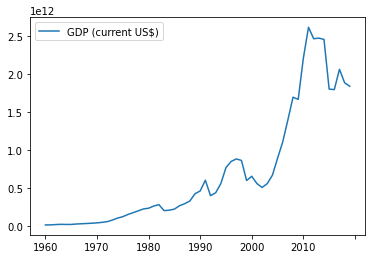

In [564]:
gdp = MyDataFrame(pd.DataFrame(data=df_bra.T.iloc[1:,1].copy()))
gdp.df.columns = [df_bra.iloc[1][0]]
gdp.title = df_bra.iloc[1][0]
gdp.unit = 'US$'
gdp.df.plot()


### CO$_{2}$

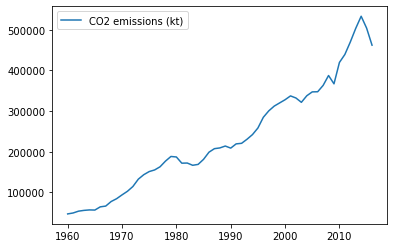

In [565]:
co2 = MyDataFrame(pd.DataFrame(data=df_bra.T.iloc[1:,5].copy()))
co2.df.columns = [df_bra.iloc[5][0]]
co2.title = df_bra.iloc[5][0]
co2.unit = 'kt'
co2.df.plot()

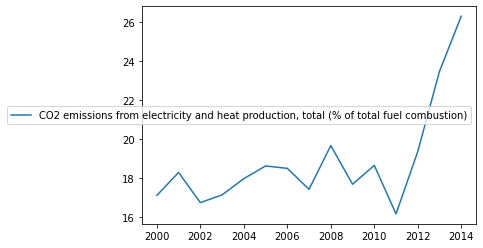

In [566]:
co2_ele = MyDataFrame(pd.DataFrame(data=df_bra.T.iloc[1:,7].copy()))
co2_ele.df.columns = [df_bra.iloc[7][0]]
co2_ele.title = df_bra.iloc[7][0]
co2_ele.unit = 'total (% of total fuel combustion)'
co2_ele.df.loc['2000':'2014'].plot()

## Modeling Data

# BEAUTIFUL PLOT FUNCTION

import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')

### Average Natural Gas Price by Region

In [52]:
yticks_max = avg_price_region.df.max().max()

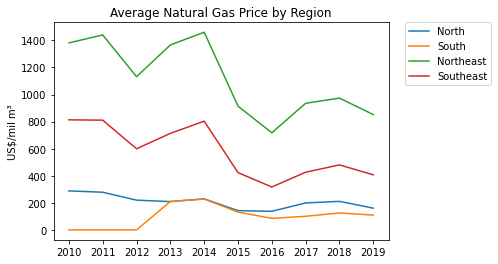

In [53]:
avg_price_region.df.T.plot()
plt.title(avg_price_region.title)
plt.legend()
plt.ylabel(avg_price_region.unit)
plt.yticks(np.arange(0, yticks_max, 200))
plt.xticks(np.arange(2010,2020,1));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Domestic Sale by Region

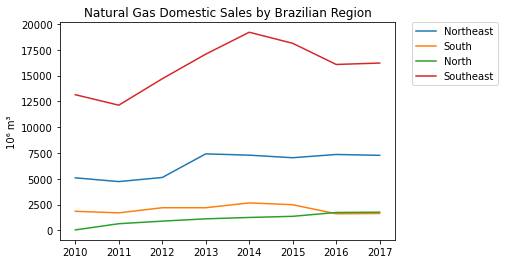

In [574]:
domestic_sale.df.loc[['Northeast','South','North','Southeast'],:].T.plot();
domestic_sale.drop_last_column()
plt.ylabel(domestic_sale.unit);
plt.title('Natural Gas Domestic Sales by Brazilian Region');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Associated and Non Associated Gas Production

In [55]:
gas_type_ymax = gas_type.df.xs('Associated', level=1).sum().max()

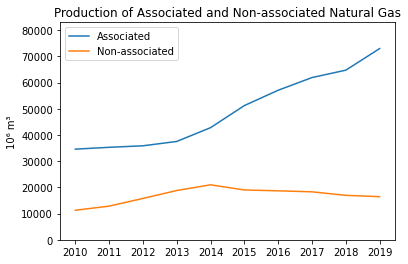

In [56]:
gas_type.df.xs('Associated', level=1).sum().plot(label='Associated');
gas_type.df.xs('Non-associated', level=1).sum().plot(label='Non-associated');
plt.xticks(np.arange(2010,2020,1));
plt.ylim(0,gas_type_ymax+10000)
plt.title('Production of Associated and Non-associated Natural Gas')
plt.ylabel(gas_type.unit)
plt.legend();

### Production by Layer

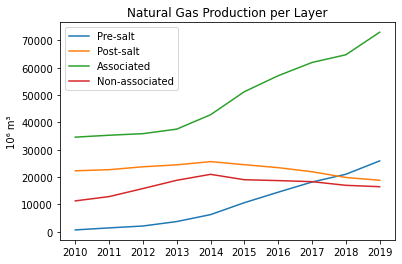

In [579]:
production.df.iloc[3].T.plot(label='Pre-salt');
production.df.iloc[4].T.plot(label='Post-salt');
gas_type.df.xs('Associated', level=1).sum().plot(label='Associated');
gas_type.df.xs('Non-associated', level=1).sum().plot(label='Non-associated');
plt.xticks(np.arange(2010,2020,1));
plt.legend();
plt.ylabel(production.unit);
plt.title('Natural Gas Production per Layer');

### Balance

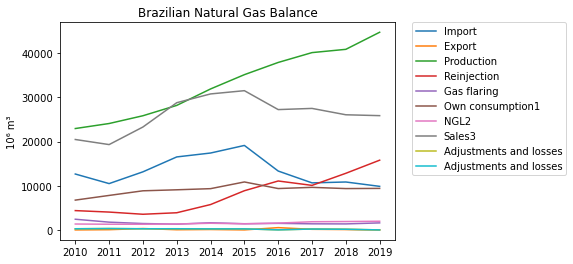

In [58]:
balance.df.T.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.xticks(np.arange(2010,2020,1));
plt.ylabel('10⁶ m³');
plt.title('Brazilian Natural Gas Balance');

#### Balance 2019

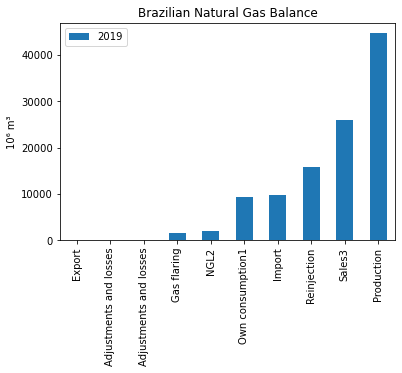

In [59]:
balance_2019 = balance.df.loc[:,2019].T.sort_values()
balance_2019.plot.bar();
plt.legend();
plt.ylabel('10⁶ m³');
plt.title('Brazilian Natural Gas Balance');

#### Import and Production

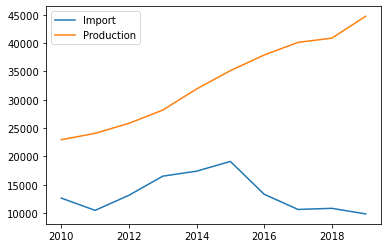

In [60]:
supply = balance.df.loc[['Import','Production']].T
supply.plot();

#### Consume

In [568]:
balance.df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Import,12647.163059,10481.230275,13142.787000,16513.465000,17398.010000,19111.557000,13320.723000,10642.550000,10842.398805,9855.431833
Export,0.000000,50.220631,312.300000,37.381800,90.466000,1.870000,517.481000,134.520000,80.136042,0.000000
Production,22938.446513,24073.730577,25832.244517,28174.212905,31894.874000,35126.447000,37890.450000,40117.402000,40857.207060,44724.231944
Reinjection,4369.053258,4037.731513,3542.732598,3883.004317,5739.690000,8866.713000,11069.494474,10076.841000,12811.951061,15776.669711
Gas flaring,2417.758896,1756.226339,1444.516950,1302.885282,1619.208000,1397.675000,1484.082000,1377.136000,1358.206104,1589.738474
Own consumption1,6744.762530,7802.974057,8850.031417,9077.946961,9335.072936,10851.056777,9359.798000,9630.178814,9352.726619,9393.638796
NGL2,1335.038659,1286.725075,1281.447149,1336.773000,1505.328000,1380.795000,1540.860000,1851.088000,1896.362000,1960.897610
Sales3,20457.563469,19307.265264,23284.159076,28783.642605,30768.358064,31502.467702,27224.483515,27490.860364,26050.725307,25854.502470
Adjustments and losses,261.432759,313.817972,259.844328,266.043941,234.761000,237.426521,14.974011,199.327822,149.498732,4.216716
Adjustments and losses,261.432760,313.817972,259.844327,266.043940,234.761000,237.426521,14.974011,199.327822,149.498732,4.216716


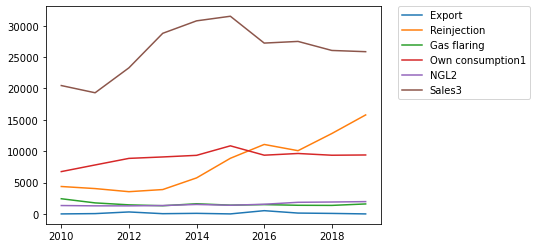

In [61]:
demand = balance.df.iloc[[1,3,4,5,6,7]].T
demand.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

#### Demand and Supply

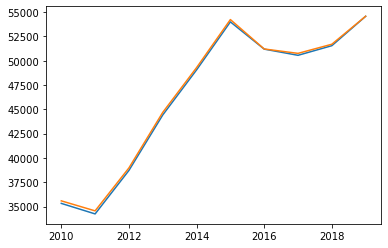

In [62]:
demand.sum(axis=1).plot();
supply.sum(axis=1).plot();

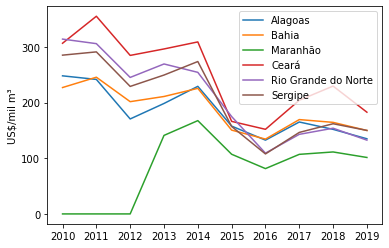

In [63]:
for state in northeast:
    avg_price.df.loc[state].plot();
    plt.ylabel(avg_price.unit)
    plt.legend(loc='best')
    plt.xticks(np.arange(2010,2020,1))
    plt.yticks(np.arange(0,avg_price.df.max().max(),100))


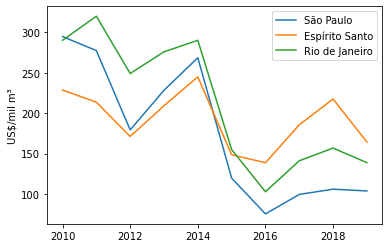

In [64]:
for state in southeast:
    avg_price.df.loc[state].plot();
    plt.ylabel(avg_price.unit)
    plt.legend(loc='best')

### Energy Matrix

In [65]:
energy_matrix

Year                                    2000                              \
Month                                     1             2             3    
Energy Type                                                                
Biomassas                           0.000000      0.000000      0.000000   
Carvao                            772.954908    726.482505    685.798458   
Energia produzida fora do SIN            NaN           NaN  20670.975000   
Eolicas                             0.000000      0.000000      0.000000   
Gas Natural                       512.536500    580.842549    513.065176   
Hidreletricas exclusive Itaipu  21074.749841  20519.823366  21184.922627   
Itaipu                           6523.780292   6362.831799   7593.289824   
Nuclear                           418.609402    400.617872    400.187101   
Oleo Diesel / Combustivel         112.026593     69.214905     78.197350   
Residuos Processos Industriais      0.000000      0.000000      0.000000   
Solar Fotovoltaica                       NaN           NaN           NaN   

Year                                                                 \
Month                                  4           5             6    
Energy Type                                                           
Biomassas                        358.8856      0.0000      0.000000   
Carvao                             0.0000    725.8747    725.001500   
Energia produzida fora do SIN      0.0000         NaN           NaN   
Eolicas                            0.0000      0.0000      0.000000   
Gas Natural                      675.6017    503.2255    574.331600   
Hidreletricas exclusive Itaipu  7128.3002  21986.3235  20503.398688   
Itaipu                            39.2871   6814.9694   6928.030200   
Nuclear                            0.0000      0.0000      0.011100   
Oleo Diesel / Combustivel        337.4032    101.4555    105.998400   
Residuos Processos Industriais     0.0000      0.0000      0.000000   
Solar Fotovoltaica                    NaN         NaN           NaN   

Year                                                                  \
Month                                    7           8            9    
Energy Type                                                            
Biomassas                           0.00000      0.0000      0.00000   
Carvao                            607.47140    627.4963    397.34310   
Energia produzida fora do SIN           NaN         NaN          NaN   
Eolicas                             0.00000      0.0000      0.00000   
Gas Natural                       540.09250    547.1182    500.28480   
Hidreletricas exclusive Itaipu  20243.01143  20366.1559  19379.09209   
Itaipu                           7423.09770   7431.3229   8093.23684   
Nuclear                            67.88070    672.3908    781.17160   
Oleo Diesel / Combustivel         130.20700    127.6278     80.34823   
Residuos Processos Industriais      0.00000      0.0000      0.00000   
Solar Fotovoltaica                      NaN         NaN          NaN   

Year                                          ...          2018                \
Month                                     10  ...            9             10   
Energy Type                                   ...                               
Biomassas                           0.000000  ...    906.250506    803.887412   
Carvao                            337.300572  ...   1202.453353   1072.563044   
Energia produzida fora do SIN            NaN  ...    244.488764    332.856552   
Eolicas                             0.000000  ...   5138.397764   4306.121173   
Gas Natural                       551.155034  ...   5240.852556   4194.910667   
Hidreletricas exclusive Itaipu  22529.277220  ...  22377.000000  25249.350506   
Itaipu                           7495.719297  ...   5219.000000   7234.961361   
Nuclear                           537.460912  ...   1448.836759   1361.985466   
Oleo Diesel / Combustivel          70.41

# Eletric Energy by Source

#### Eletric Energy DataFrame

In [580]:
energy = energy_matrix.sum(axis=1, level=0).copy()
energy.index = ['Biomass','Coal','Energy Produced Out of SIN','Eolic','Natural Gas','Hidrelectric','Itaipu','Nuclear','Diesel/Oil','Waste Industrial Processes','Solar']
energy = energy.T
energy['Hydroelectric'] = energy.loc[:,'Itaipu']+energy.loc[:,'Hidrelectric']
energy.drop(['Hidrelectric','Itaipu'], axis=1, inplace=True)
energy.drop(2019,inplace=True)

### Electric Energy by Source Area Plot

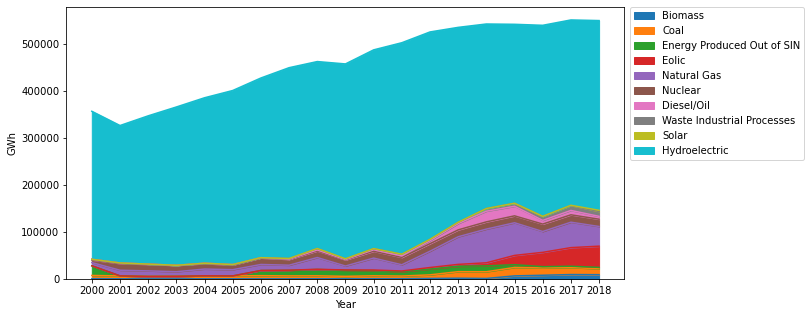

In [594]:
energy.plot(kind='area', figsize=(10,5));
plt.xticks(np.arange(2000,2019,1));
plt.ylabel('GWh');
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

### Proportions

In [530]:
prop = energy.T.div(energy.sum(axis=1)).copy()
prop = prop.T

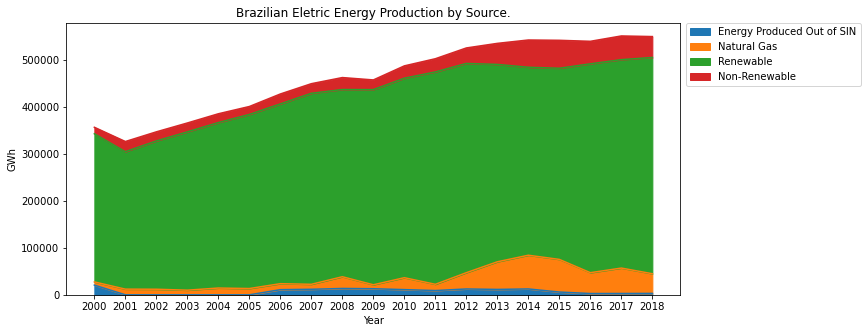

In [544]:
energy_type = energy.copy()
energy_type['Renewable']=energy['Biomass']+energy['Hydroelectric']+energy['Eolic']+energy['Solar']
energy_type['Non-Renewable']=energy['Diesel/Oil']+energy['Coal']+energy['Nuclear']+energy['Waste Industrial Processes']
energy_type.drop(['Biomass','Hydroelectric','Eolic','Solar','Diesel/Oil','Coal','Nuclear','Waste Industrial Processes'], axis=1, inplace=True)
energy_type.plot(kind='area', stacked=True, figsize=(11,5))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');
plt.xticks(np.arange(2000,2019,1));
plt.title('Brazilian Eletric Energy Production by Source.');

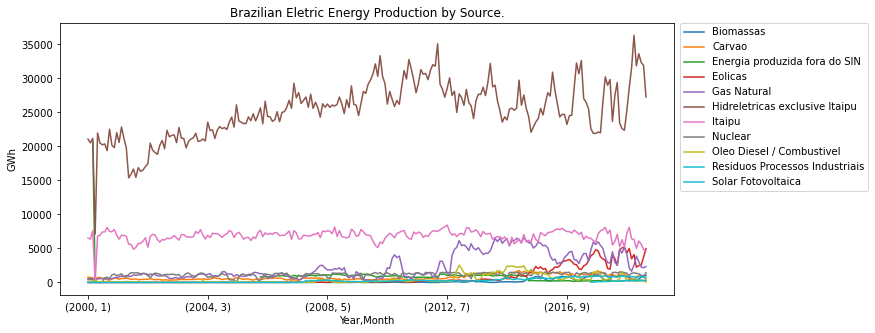

In [585]:
energy_matrix.T.plot(figsize=(11,5), colormap='tab10')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');
plt.title('Brazilian Eletric Energy Production by Source.');

In [560]:
energy_matrix#.sum(axis=0).plot()

Year                                    2000                              \
Month                                     1             2             3    
Energy Type                                                                
Biomassas                           0.000000      0.000000      0.000000   
Carvao                            772.954908    726.482505    685.798458   
Energia produzida fora do SIN            NaN           NaN  20670.975000   
Eolicas                             0.000000      0.000000      0.000000   
Gas Natural                       512.536500    580.842549    513.065176   
Hidreletricas exclusive Itaipu  21074.749841  20519.823366  21184.922627   
Itaipu                           6523.780292   6362.831799   7593.289824   
Nuclear                           418.609402    400.617872    400.187101   
Oleo Diesel / Combustivel         112.026593     69.214905     78.197350   
Residuos Processos Industriais      0.000000      0.000000      0.000000   
Solar Fotovoltaica                       NaN           NaN           NaN   

Year                                                                 \
Month                                  4           5             6    
Energy Type                                                           
Biomassas                        358.8856      0.0000      0.000000   
Carvao                             0.0000    725.8747    725.001500   
Energia produzida fora do SIN      0.0000         NaN           NaN   
Eolicas                            0.0000      0.0000      0.000000   
Gas Natural                      675.6017    503.2255    574.331600   
Hidreletricas exclusive Itaipu  7128.3002  21986.3235  20503.398688   
Itaipu                            39.2871   6814.9694   6928.030200   
Nuclear                            0.0000      0.0000      0.011100   
Oleo Diesel / Combustivel        337.4032    101.4555    105.998400   
Residuos Processos Industriais     0.0000      0.0000      0.000000   
Solar Fotovoltaica                    NaN         NaN           NaN   

Year                                                                  \
Month                                    7           8            9    
Energy Type                                                            
Biomassas                           0.00000      0.0000      0.00000   
Carvao                            607.47140    627.4963    397.34310   
Energia produzida fora do SIN           NaN         NaN          NaN   
Eolicas                             0.00000      0.0000      0.00000   
Gas Natural                       540.09250    547.1182    500.28480   
Hidreletricas exclusive Itaipu  20243.01143  20366.1559  19379.09209   
Itaipu                           7423.09770   7431.3229   8093.23684   
Nuclear                            67.88070    672.3908    781.17160   
Oleo Diesel / Combustivel         130.20700    127.6278     80.34823   
Residuos Processos Industriais      0.00000      0.0000      0.00000   
Solar Fotovoltaica                      NaN         NaN          NaN   

Year                                          ...          2018                \
Month                                     10  ...            9             10   
Energy Type                                   ...                               
Biomassas                           0.000000  ...    906.250506    803.887412   
Carvao                            337.300572  ...   1202.453353   1072.563044   
Energia produzida fora do SIN            NaN  ...    244.488764    332.856552   
Eolicas                             0.000000  ...   5138.397764   4306.121173   
Gas Natural                       551.155034  ...   5240.852556   4194.910667   
Hidreletricas exclusive Itaipu  22529.277220  ...  22377.000000  25249.350506   
Itaipu                           7495.719297  ...   5219.000000   7234.961361   
Nuclear                           537.460912  ...   1448.836759   1361.985466   
Oleo Diesel / Combustivel          70.41

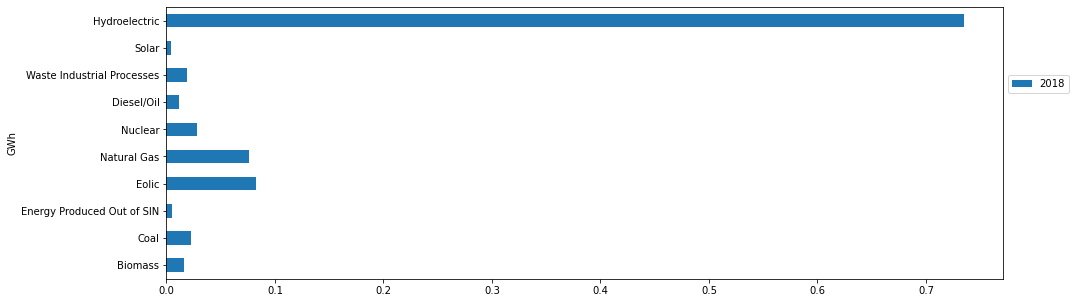

In [550]:
prop.loc[2018].plot(kind='barh', stacked=True, figsize=(15,5),sort_columns=True)
plt.legend(bbox_to_anchor=(1.005, 0.75), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');

####

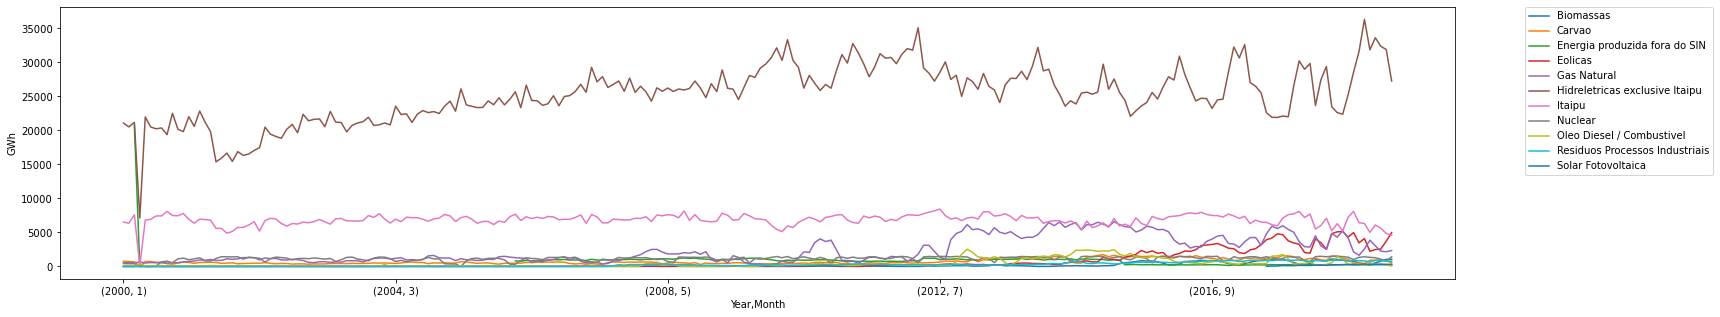

In [71]:
energy_matrix.T.plot(figsize=(25,5));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');

In [112]:
energy_source = energy_matrix.loc[:,2018].sum(axis=1)
energy_source.index = ['Biomass','Coal','Energy Produced Out of SIN','Eolic','Natural Gas', 'Hidrelectric','Itaipu','Nuclear','Diesel/Oil','Waste Industrial Processes','Solar']
energy_source.drop(['Hidrelectric','Itaipu'], inplace=True)
energy_source

Biomass                        8746.024599
Coal                          12567.356132
Energy Produced Out of SIN     2974.635287
Eolic                         45148.016764
Natural Gas                   41833.510312
Nuclear                       15474.412837
Diesel/Oil                     6103.918949
Waste Industrial Processes    10360.136166
Solar                          2526.204816
dtype: float64

In [117]:
energy_source['Hidrelectric'] = (energy_matrix.loc['Itaipu',2018]+energy_matrix.loc['Hidreletricas exclusive Itaipu',2018]).sum()
energy_source.sort_values(inplace=True)

In [562]:
energy_matrix.drop(2019,axis=1).sum(axis=0)

Year  Month
2000  1        29414.657538
      2        28659.812997
      3        51126.435535
      4         8539.477800
      5        30131.848600
                   ...     
2018  8        45205.003091
      9        44054.821307
      10       45943.458156
      11       47665.552270
      12       47233.344605
Length: 228, dtype: float64

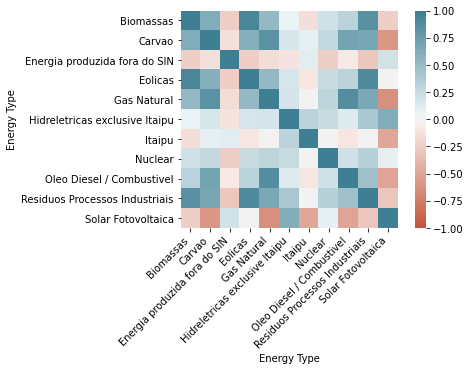

In [72]:
corr = energy_matrix.T.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

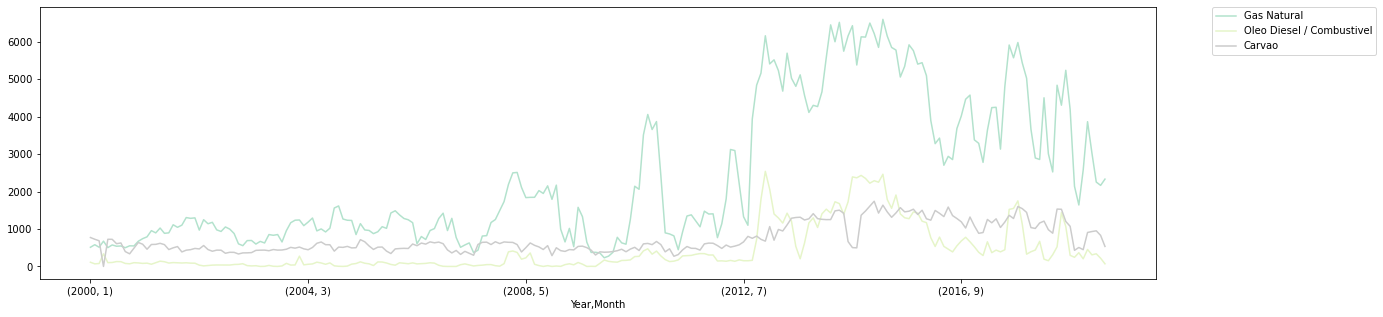

In [502]:
energy_matrix.loc[['Gas Natural','Oleo Diesel / Combustivel','Carvao']].T.plot(figsize=(20,5),colormap='Pastel2');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

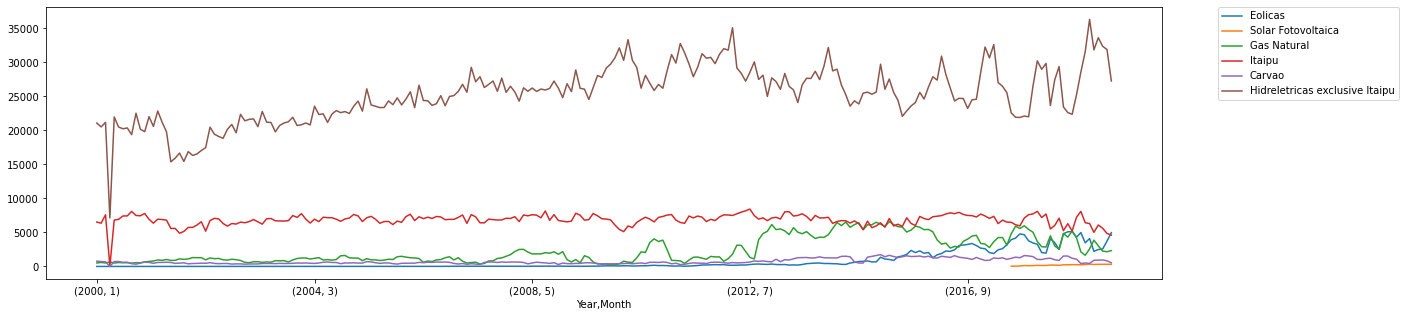

In [74]:
energy_matrix.loc[['Eolicas','Solar Fotovoltaica','Gas Natural','Itaipu','Carvao', 'Hidreletricas exclusive Itaipu'],:].T.plot(figsize=(20,5));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [75]:
years = np.arange(2000,2020,1)
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

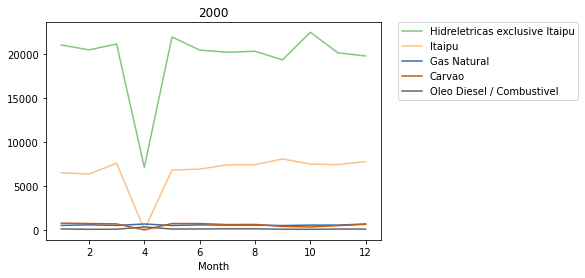

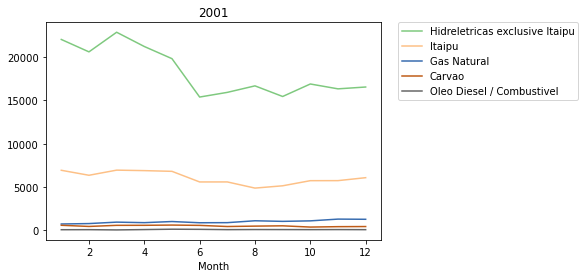

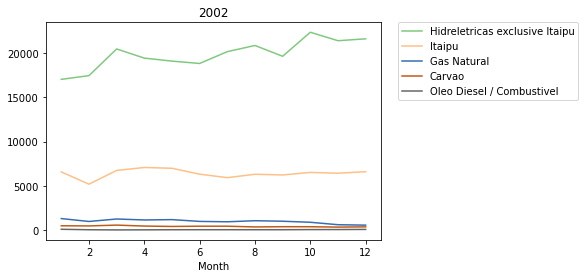

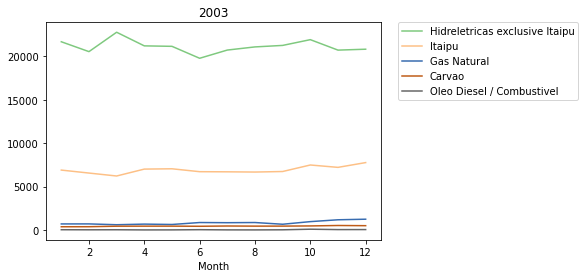

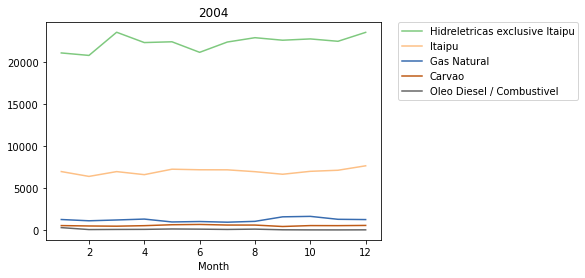

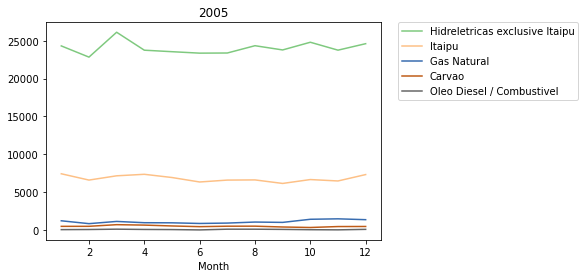

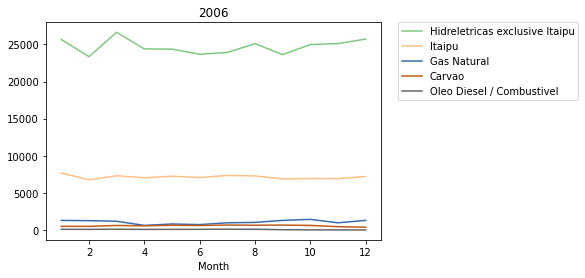

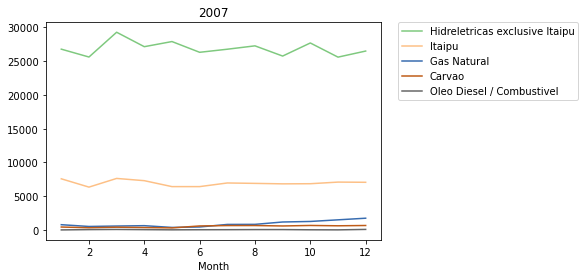

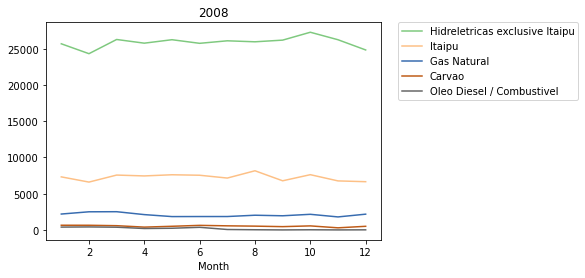

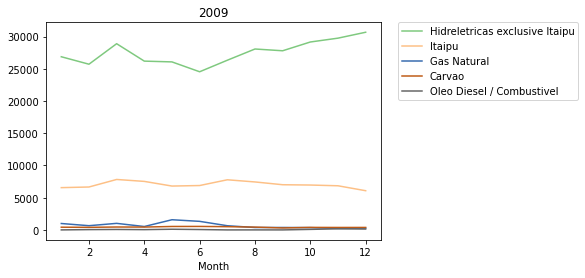

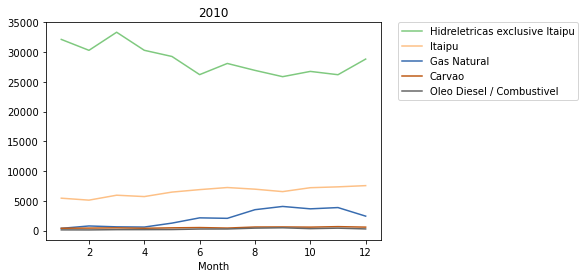

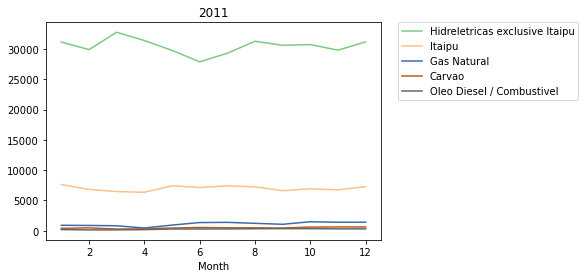

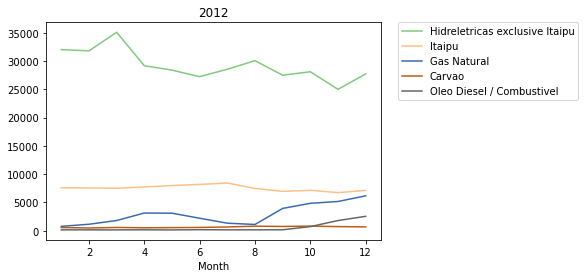

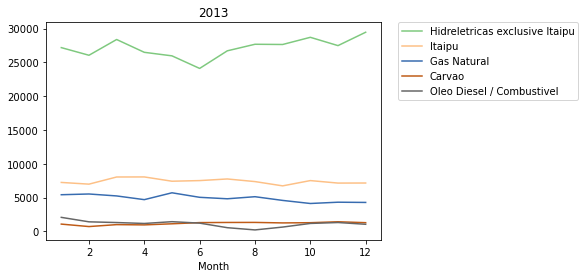

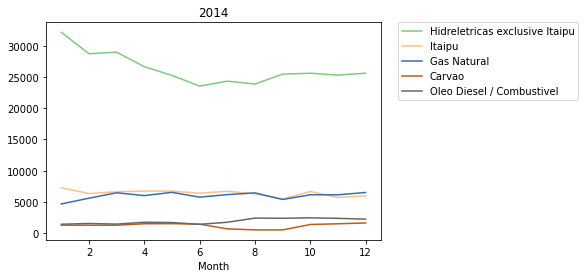

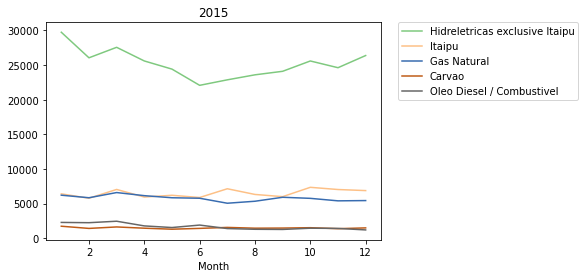

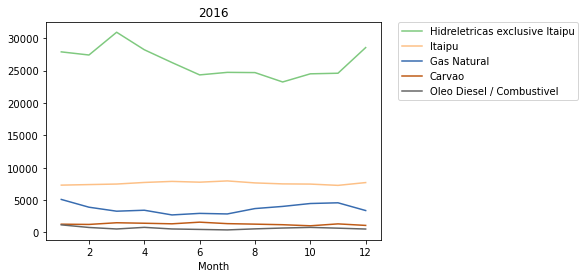

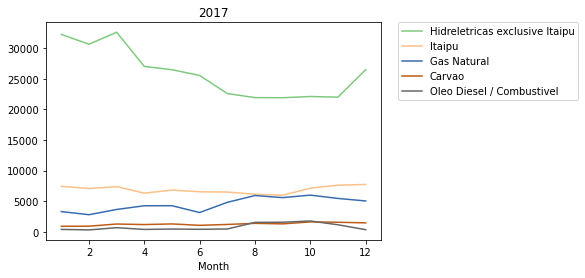

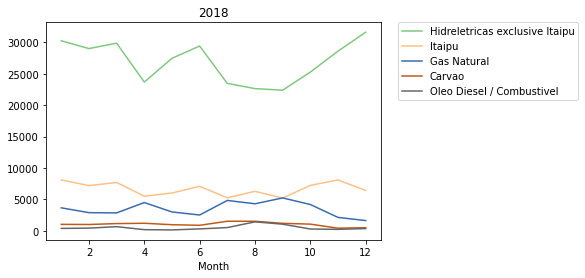

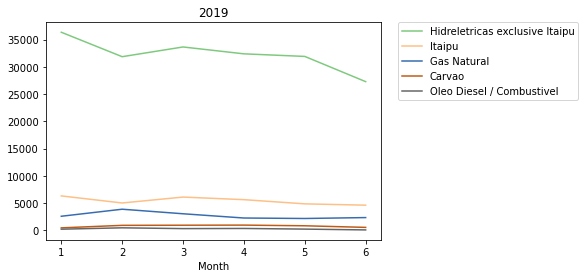

In [504]:
for year in years:
    energy_matrix.loc[['Hidreletricas exclusive Itaipu', 'Itaipu','Gas Natural','Carvao','Oleo Diesel / Combustivel'],year].T.plot(colormap='Accent');
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
    plt.title(year)


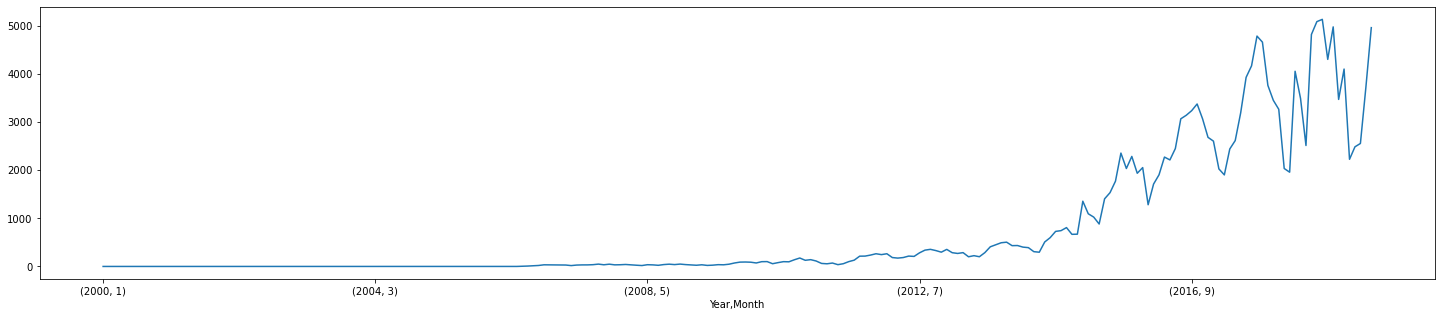

In [77]:
energy_matrix.loc['Eolicas',:].plot(figsize=(25,5));
plt.xticks();

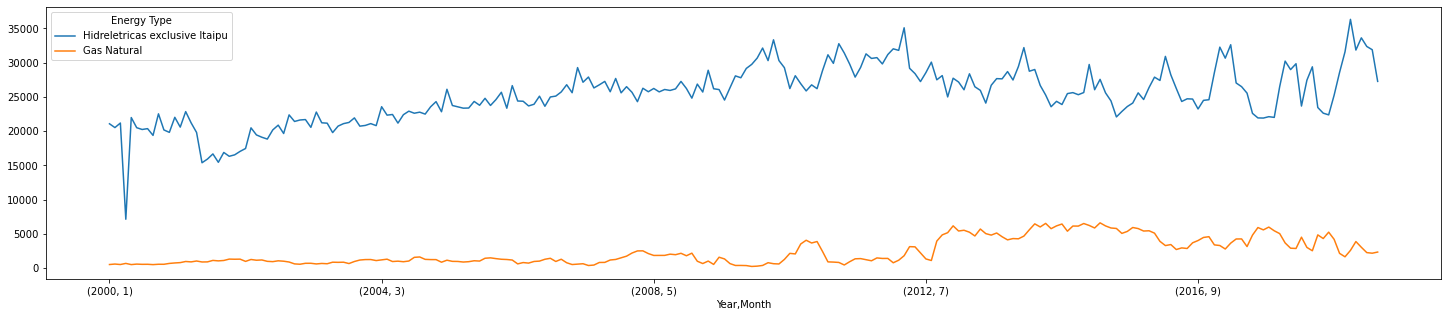

In [78]:
energy_matrix.loc[['Hidreletricas exclusive Itaipu','Gas Natural'],:].T.plot(figsize=(25,5));
plt.xticks();